<a href="https://colab.research.google.com/github/kokchun/Python-course-AI22/blob/main/Exercises/08-file-handling.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# file handling exercises

---
These are introductory exercises in Python with focus in **file handling**.

All files needed for these exercises can be found in the **files** folder in this repo. Clone the repo to access them.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable and function names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice rolls (*)
Create a textfile called **dice_rolls.txt** using Python. Also for each subtask, write adequate headers. 

&nbsp; a) &nbsp; Simulate 20 dice rolls and write them to your textfile. (*)

&nbsp; b) &nbsp; Sort the dice rolls from a) and write them to a separate row in the same textfile. (*)

&nbsp; c) &nbsp; Count the number of fours in the dice rolls and write them to a separate row in the same textfile. (*)

<details>

<summary>Answer </summary>

For example: 

```

Simulate 20 dice rolls:
[3 4 4 3 1 2 6 6 4 6 2 4 5 3 1 2 1 3 3 1]

Sorted dice rolls:
[1 1 1 1 2 2 2 3 3 3 3 3 4 4 4 4 5 6 6 6]

Number of fours: 4

```

</details>

In [ ]:
import random
import re

with open("dicerolls.txt", "w") as f_write:
    f_write.write("20 random dice:\n")

    for action in range(20):
        dice = random.randint(1, 6)
        f_write.write(str(dice))

with open("dicerolls.txt", "r+") as f_read:
    
    string = f_read.readlines()[-1]
    newlist = [int(x) for x in string] # https://bobbyhadz.com/blog/python-split-string-into-list-of-integers
    sortedlist = sorted(newlist)
    
    cleaned = re.sub(r"[\s\[\]\,]", "", str(sortedlist))
    f_read.write("\nSorted list:\n" + cleaned)

    fours = str(len(re.findall(r"[4]", str(cleaned))))
    f_read.write("\nNumber of fours:\n" + fours)


---
## 2. Test results (*)
Read in the file [test_result.txt][test_result] in Python.

[test_result]: https://github.com/kokchun/Programmering-med-Python-21/blob/main/Files/test_result.txt

&nbsp; a) &nbsp; Print out the text in the terminal (*)

&nbsp; b) &nbsp; Create new rows in the same file and write the people and their corresponding scores in alphabetical order. (*)

&nbsp; c) &nbsp; Create additional rows in the same file and sort the people after their grades. The grade limits are: (**)

- F < 20
- E: 20-29
- D: 30-39
- C: 40-49
- B: 50-59
- A: 60-70

<details>

<summary>Hint </summary>

Open the file using option "r" for read and open the file using option "a" for append. 

</details>
<br>
<details>

<summary>Answer </summary>

```

Adam Gustafsson 25
Emil Johansson 23
Sven Erik Karlsson 13
Ove Karlsten 41
Emma Boden 32
Ida Håkansson 23
Ella Ester 41
Hanna Karlsson 23 
Johan Johansson 42
Sven Erik Lundin 39
Björn Björnsson 39
Karl Karlsson 32
Bose Bosseson 32
Håkan Håkanson 24
Jonas Jonasson 31
Erik Eriksson 31
Gore Bord 55
Jakob Kallander 65
Fredrika Ulven 10

Sorted alphabetically
Adam Gustafsson 25
Björn Björnsson 39
Bose Bosseson 32
Ella Ester 41
Emil Johansson 23
Emma Boden 32
Erik Eriksson 31
Fredrika Ulven 10
Gore Bord 55
Hanna Karlsson 23
Håkan Håkanson 24
Ida Håkansson 23
Jakob Kallander 65
Johan Johansson 42
Jonas Jonasson 31
Karl Karlsson 32
Ove Karlsten 41
Sven Erik Karlsson 13
Sven Erik Lundin 39

Sorted results: 
Grade: F
Fredrika Ulven 10
Sven Erik Karlsson 13
Grade: E
Adam Gustafsson 25
Emil Johansson 23
Hanna Karlsson 23
Håkan Håkanson 24
Ida Håkansson 23
Grade: D
Björn Björnsson 39
Bose Bosseson 32
Emma Boden 32
Erik Eriksson 31
Jonas Jonasson 31
Karl Karlsson 32
Sven Erik Lundin 39
Grade: C
Ella Ester 41
Johan Johansson 42
Ove Karlsten 41
Grade: B
Gore Bord 55
Grade: A
Jakob Kallander 65

```

</details>

In [7]:
import re

with open("test_result.txt", "r") as resulttxt:
    results = resulttxt.readlines() 
    onlyname = re.findall(r"[A-Za-z]+ [A-Za-z]+ ?[A-Za-z]+", str(results)) # a-zA-Z\u00c0-\u017e  special ÖÅÄ osv
    onlygrade = re.findall(r"\d+", str(results))

    dict_results = dict(zip(onlyname, onlygrade))

    with open("newresults.txt", 'w') as f:
        f.write("Grade F:\n") 
        for key, value in sorted(dict_results.items()):
            if int(value) < 20:
                f.write('%s:%s\n' % (key, value))
        
        f.write("\nGrade E\n") 
        for key, value in sorted(dict_results.items()):
            if 29 >= int(value) >= 20:
                f.write('%s:%s\n' % (key, value))

        f.write("\nGrade D\n") 
        for key, value in sorted(dict_results.items()):
            if 39 >= int(value) >= 30:
                f.write('%s:%s\n' % (key, value))
        
        f.write("\nGrade C\n") 
        for key, value in sorted(dict_results.items()):
            if 49 >= int(value) >= 40:
                f.write('%s:%s\n' % (key, value))

        f.write("\nGrade B\n") 
        for key, value in sorted(dict_results.items()):
            if 59 >= int(value) >= 50:
                f.write('%s:%s\n' % (key, value))
        
        f.write("\nGrade A\n") 
        for key, value in sorted(dict_results.items()):
            if 70 >= int(value) >= 60:
                f.write('%s:%s\n' % (key, value))

                
print(dict_results)
           


{'Adam Gustafsson': '25', 'Emil Johansson': '23', 'Sven Erik Karlsson': '13', 'Ove Karlsten': '41', 'Emma Boden': '32', 'Ida Hakansson': '23', 'Ella Ester': '41', 'Hanna Karlsson': '23', 'Johan Johansson': '42', 'Sven Erik Lundin': '39', 'Bjorn Bjornsson': '39', 'Karl Karlsson': '32', 'Bose Bosseson': '32', 'Hakan Hakanson': '24', 'Jonas Jonasson': '31', 'Erik Eriksson': '31', 'Gore Bord': '55', 'Jakob Kallander': '65', 'Fredrika Ulven': '10'}


In [6]:
## Exercise session 3, lesson 8 upg 02.
with open("test_result.txt") as f_read:
    # each line is stored in a list
    # each line is a string
    # each line is and it has \n in the end
    lines = f_read.readlines()
    print(lines)
    
    # -------------------- a) ------------------------
    # loops through the lines and prints each line
    for line in lines:
        print(line, end="") # end tar bort \n

['Adam Gustafsson 25\n', 'Emil Johansson 23\n', 'Sven Erik Karlsson 13\n', 'Ove Karlsten 41\n', 'Emma Boden 32\n', 'Ida Hakansson 23\n', 'Ella Ester 41\n', 'Hanna Karlsson 23 \n', 'Johan Johansson 42\n', 'Sven Erik Lundin 39\n', 'Bjorn Bjornsson 39\n', 'Karl Karlsson 32\n', 'Bose Bosseson 32\n', 'Hakan Hakanson 24\n', 'Jonas Jonasson 31\n', 'Erik Eriksson 31\n', 'Gore Bord 55\n', 'Jakob Kallander 65\n', 'Fredrika Ulven 10']
Adam Gustafsson 25
Emil Johansson 23
Sven Erik Karlsson 13
Ove Karlsten 41
Emma Boden 32
Ida Hakansson 23
Ella Ester 41
Hanna Karlsson 23 
Johan Johansson 42
Sven Erik Lundin 39
Bjorn Bjornsson 39
Karl Karlsson 32
Bose Bosseson 32
Hakan Hakanson 24
Jonas Jonasson 31
Erik Eriksson 31
Gore Bord 55
Jakob Kallander 65
Fredrika Ulven 10

In [29]:
#---------------------------- b) ---------------------------
with open("test_result.txt", "r") as f_read, open("test_result_tmp", "w") as f_write:
    lines = f_read.readlines()

    lines[-1] += "\n"

    f_write.write("\n\nAlfabetisk ordning\n")

    # ----------------------------b)--------------------------
    lines_sorted_alphabetically = sorted(lines)

    for line in lines_sorted_alphabetically:
        f_write.write(line)


    f_write.write("\n\nSorterat efter betyg\n\n")

    # ----------------------------c)--------------------------
    # need to split and find the score for each line
    # put them in grade order

    grades = "ABCDEF"[::-1]
    print(grades)

    for grade, limit in zip(grades, range(20, 71, 10)):

        f_write.write(f"\nBetyg {grade}\n")

        for line in lines:
            #print(line.split()) # this gives a list for each line 
            print(line.split()[-1])

            point = int(line.split()[-1]) # type converts string to int
            # if statement requires test between same types
            
            # handle F separately in order not to miss those lower than 10

            if limit-10 <= point < limit:
                f_write.write(f"{line}") # type converts int to string, in order to write it to a txt file



FEDCBA
25
23
13
41
32
23
41
23
42
39
39
32
32
24
31
31
55
65
10
25
23
13
41
32
23
41
23
42
39
39
32
32
24
31
31
55
65
10
25
23
13
41
32
23
41
23
42
39
39
32
32
24
31
31
55
65
10
25
23
13
41
32
23
41
23
42
39
39
32
32
24
31
31
55
65
10
25
23
13
41
32
23
41
23
42
39
39
32
32
24
31
31
55
65
10
25
23
13
41
32
23
41
23
42
39
39
32
32
24
31
31
55
65
10


---
## 3. National test (*)
Read in the file [NPvt19Ma2A.txt][files] and [NPvt19Ma2C.txt][files] in Python. Use **matplotlib** to plot pie charts for each grade categories in each file. (*)

[files]: https://github.com/kokchun/Programmering-med-Python-21/tree/main/Files

<details>

<summary>Hint </summary>

Use **subplot** in **matplotlib**

</details>
<br>
<details>

<summary>Answer </summary>

<img align="left" src="../assets/NP.png" width="300"/>

</details>

C:\Users\edins\AppData\Local\Temp\ipykernel_8156\1152909751.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ma2a["Percentage"] = ma2a["Percentage"].str.replace("[%]", "").astype(float)
C:\Users\edins\AppData\Local\Temp\ipykernel_8156\1152909751.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  ma2c["Percentage"] = ma2c["Percentage"].str.replace("[%]", "").astype(float)


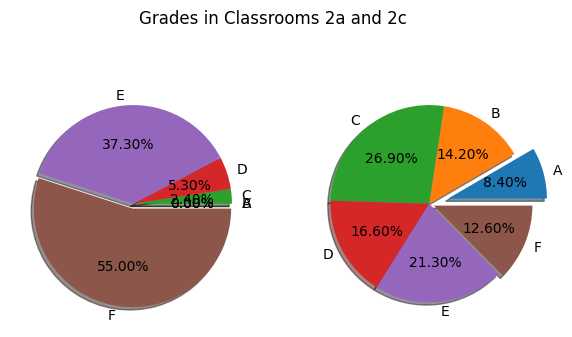

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
ma2a = pd.read_csv("Ma2A.txt", sep=" ", header=None)
ma2a.columns = ["Grade", "Percentage"]

ma2c = pd.read_csv("Ma2C.txt", sep=" ", header=None)
ma2c.columns = ["Grade", "Percentage"]

# Replace % and convert to float
ma2a["Percentage"] = ma2a["Percentage"].str.replace("[%]", "").astype(float)
ma2c["Percentage"] = ma2c["Percentage"].str.replace("[%]", "").astype(float)

# Plot the data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4),)
fig.suptitle("Grades in Classrooms 2a and 2c")

# First pie (2a)
ax1.pie(ma2a["Percentage"], labels=ma2a["Grade"], autopct="%1.2f%%", explode=(0,0,0,0,0,0.05), shadow=True)    # https://www.youtube.com/watch?v=oUe2Q2yz5tM  some tips.

# Second (2c)
ax2.pie(ma2c["Percentage"], labels=ma2c["Grade"], autopct="%1.2f%%", explode=(0.2,0,0,0,0,0.05), shadow=True);




---
## 4. Dice roll experiment (**)
Simulate 10, 100, 1000, 10000, 100000 dice rolls and count the freqencies and probabilities for each number in each simulation. Create a new text file using Python with the name "simulation.txt" and write the results to that text file.(**)

[files]: https://github.com/kokchun/Programmering-med-Python-21/tree/main/Files

<details>

<summary>Answer </summary>

```

Number of rolls: 10 
Ones: 4, probability: 0.4
Twos: 1, probability: 0.1
Threes: 1, probability: 0.1
Fours: 2, probability: 0.2
Fives: 1, probability: 0.1
Sixes: 1, probability: 0.1

Number of rolls: 100 
Ones: 16, probability: 0.16
Twos: 12, probability: 0.12
Threes: 24, probability: 0.24
Fours: 18, probability: 0.18
Fives: 16, probability: 0.16
Sixes: 14, probability: 0.14

Number of rolls: 1000 
Ones: 181, probability: 0.181
Twos: 167, probability: 0.167
Threes: 184, probability: 0.184
Fours: 152, probability: 0.152
Fives: 168, probability: 0.168
Sixes: 148, probability: 0.148

Number of rolls: 10000 
Ones: 1630, probability: 0.163
Twos: 1666, probability: 0.1666
Threes: 1686, probability: 0.1686
Fours: 1616, probability: 0.1616
Fives: 1677, probability: 0.1677
Sixes: 1725, probability: 0.1725

Number of rolls: 100000 
Ones: 16804, probability: 0.16804
Twos: 16625, probability: 0.16625
Threes: 16646, probability: 0.16646
Fours: 16660, probability: 0.1666
Fives: 16576, probability: 0.16576
Sixes: 16689, probability: 0.16689

```

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---